Task #3
1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule 
data: bioresponse.csv, 
description from Kaggle: “The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized.”). 
Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.
2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.
3.	For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 
4.	Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms.


In [169]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Implementation of the models

Logistik function from the lab notebook:

In [127]:
# sigmoid
def sigmoid(z):
    s = 1./(1.+np.exp(-z))
    return s

# initialize_with_zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.
    return w, b

# propagate
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# optimize
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# predict
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

# model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    X_train = X_train.T
    X_test = X_test.T

    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {:.1f} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {:.1f} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

SGD implementation:

In [164]:
# optimize using SGD
def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, batch_size = 5, print_cost = False):
    """
    This function optimizes w and b by running a stochastic gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    batch_size -- size of the batch of samples, that are taken into account for optimization at each step
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed on all train dataset during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    batch_size = min(X.shape[1], batch_size)
    
   
    for i in range(num_iterations):
        
        #batch selection
        batch_ids = np.random.choice(X.shape[1], batch_size ,replace=False)
        sub_X = X[:, batch_ids]
        sub_Y = Y[batch_ids]
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, sub_X, sub_Y)
        
        #To demonstrate defferences of the loss results of SGD in comparison with GD we need to calculate loss function on all dataset
        _, cost_j = propagate(w, b, X, Y)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        costs.append(cost_j)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost_j))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# model SGD
def model_sgd(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, batch_size = 5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    X_train = X_train.T
    X_test = X_test.T

    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Stochastic gradient descent
    parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, batch_size, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {:.1f} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {:.1f} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Adam optimizer:

In [173]:
# optimize using Adam optimizer
def optimize_adam(w, b, X, Y, num_iterations, learning_rate, b_1=0.9, b_2=0.999, eps=1e-8, batch_size = 5, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    b_1 and b_2 -- learning parametrs of Adam optimizer
    eps -- parametr to avoid division by zero.
    batch_size -- size of the batch of samples, that are taken into account for optimizatio at each step
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    #Initialization of the parameters for Adam optimizer
    v = 0
    s = 0
    batch_size = min(X.shape[1], batch_size)

   
    for i in range(num_iterations):
        #batch selection
        batch_ids = np.random.choice(X.shape[1], batch_size ,replace=False)
        sub_X = X[:, batch_ids]
        sub_Y = Y[batch_ids]
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, sub_X, sub_Y)
        
        #To demonstrate defferences of the loss results of Adam in comparison with GD we need to calculate loss function on all dataset
        _, cost_j = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        full_grad = np.concatenate((dw, db.reshape(1, 1)))
        
        # update rule
        v = b_1 * v + (1 - b_1) * full_grad
        s = b_2 * s + (1 - b_2) * np.sum(full_grad**2)
        
        w -= learning_rate / (np.sqrt(s) + eps) * v[:-1]
        b -= learning_rate / (np.sqrt(s) + eps) * v[1]
        
        # Record the costs
        costs.append(cost_j)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost_j))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# model SGD
def model_adam(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, b_1=0.9, b_2=0.999, eps=1e-8, batch_size = 5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    X_train = X_train.T
    X_test = X_test.T

    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, b_1, b_2, eps, batch_size, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {:.1f} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {:.1f} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Data preporation

In [30]:
df = pd.read_csv('bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = df.drop('Activity', axis=1).to_numpy()
#X = normalize(X)
y = df.Activity.to_numpy()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Analysis of the results

In [185]:
#list of learning rates
lr_list = [0.0001, 0.001, 0.005, 0.01, 0.1]

#number of iterations
it_num = 3000

gd_results = []
sgd_results = []
adam_results = []

#calculation of the results
for lr in lr_list:
    print('GD, lr =', lr)
    gd_results.append(model(X_train, y_train, X_test, y_test, num_iterations = it_num, learning_rate = lr))
    print('SGD, lr =', lr)
    sgd_results.append(model_sgd(X_train, y_train, X_test, y_test, num_iterations = it_num, learning_rate = lr))
    print('Adam, lr =', lr)
    adam_results.append(model_adam(X_train, y_train, X_test, y_test, num_iterations = it_num, learning_rate = lr))
    
all_results = [gd_results, sgd_results, adam_results]

GD, lr = 0.0001
train accuracy: 60.3 %
test accuracy: 64.8 %
SGD, lr = 0.0001
train accuracy: 58.8 %
test accuracy: 62.7 %
Adam, lr = 0.0001
train accuracy: 56.3 %
test accuracy: 60.0 %
GD, lr = 0.001
train accuracy: 73.2 %
test accuracy: 73.0 %
SGD, lr = 0.001
train accuracy: 73.1 %
test accuracy: 72.9 %
Adam, lr = 0.001
train accuracy: 69.9 %
test accuracy: 70.8 %
GD, lr = 0.005
train accuracy: 77.9 %
test accuracy: 75.3 %
SGD, lr = 0.005
train accuracy: 77.1 %
test accuracy: 74.5 %
Adam, lr = 0.005
train accuracy: 76.6 %
test accuracy: 74.9 %
GD, lr = 0.01
train accuracy: 79.5 %
test accuracy: 76.1 %
SGD, lr = 0.01
train accuracy: 79.3 %
test accuracy: 75.7 %
Adam, lr = 0.01
train accuracy: 78.2 %
test accuracy: 75.8 %
GD, lr = 0.1
train accuracy: 84.4 %
test accuracy: 75.8 %
SGD, lr = 0.1
train accuracy: 80.9 %
test accuracy: 75.4 %
Adam, lr = 0.1
train accuracy: 80.8 %
test accuracy: 75.5 %


Learning curves  that demostrate dependences of the value of the loss function of all train datset on the iteration number under varios values of leraning rate:

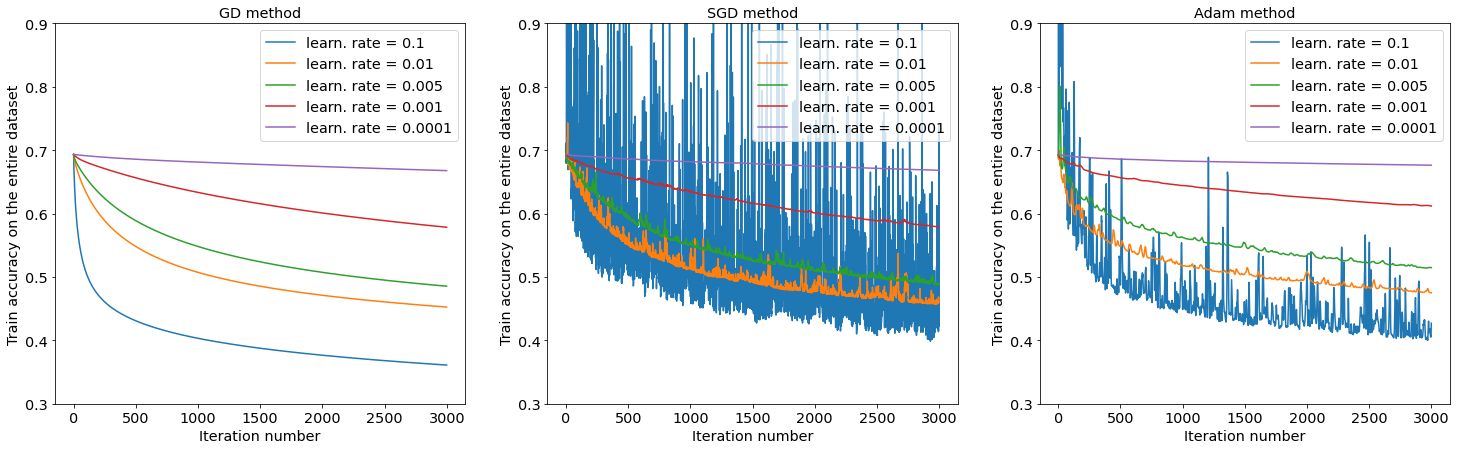

In [190]:
title_names = ['GD method', 'SGD method', 'Adam method']
fig, axs = plt.subplots(1, 3, figsize=(25, 7))
for i in range(3):
    for j in range(len(lr_list) - 1, -1, -1):
        axs[i].plot(all_results[i][j]['costs'][::], label=f"learn. rate = {lr_list[j]}")
    
    axs[i].set_title(title_names[i])
    axs[i].set_xlabel("Iteration number")
    axs[i].set_ylabel("Train accuracy on the entire dataset")
    axs[i].set_ylim([0.3, 0.9]);
    axs[i].legend()


How it can be seen, learning curves of the GD method is smooth. It happens because GD takes all train data into account to make one iteration step. While SGD considers only few random objects (batch of samples), but sometimes decreasing of loss-function on a batch causes increasing the loss on all train data. But in average loss function is converges and in case of big data the SGD method does a lot more iterations and converges much faster than usual GD. In our implementation of SGD method, we calculated loss-function on all train data at every step to demonstrate differences of learning curves in comparison with usual GD method, therefore we did not get performance benefit. Adam method uses more sophisticated algorithm to smooth the movement of a point in the space of optimized parameters. Therefore, we see that learning curves of Adam method are much smoother than curves of SGD method, it allows to rich minimum of the optimized function more directly and more effectively.

Accuracy results of all algorithms on test dataset are presented below:

In [195]:
accuracy_results = np.zeros((3, len(lr_list)))

for i in range(3):
    for j in range(len(lr_list)):
        accuracy_results[i, j] = accuracy_score(y_test, all_results[i][j]['Y_prediction_test'][0])
lr_name = [f"lr={lr}" for lr in lr_list]        
accuracy_table = pd.DataFrame(data=accuracy_results, index=['GD', 'SGD', 'Adam'], columns=lr_name)
print('\n Accuracy results measured on test dataset for different methods and various learning rate \n')
accuracy_table.round(3)


 Accuracy results measured on test dataset for different methods and various learning rate 



,lr=0.0001,lr=0.001,lr=0.005,lr=0.01,lr=0.1
GD,0.648,0.730,0.753,0.761,0.758
SGD,0.627,0.729,0.745,0.757,0.754
Adam,0.600,0.708,0.749,0.758,0.755


In our experiment usual GD method shows slightly better results than stochastic method, because usual GD calculates gradient using all train data. But in cases of big train data, we won't be able to apply this method due to it large time consumption. Results of SGD and Adam methods are almost the same, Adam optimizer converges a little faster in cases of lr = 0.005, 0.001, 0.1. But in case of complex surfaces of a loss function Adam optimizer can significantly outperform usual SGD method.